In [1]:
import os
import glob
import cv2 
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def readImage(location):
    image = nib.load(location)
    return np.array(image.get_fdata())[:,:,:,0]/np.array(image.get_fdata())[:,:,:,0].max()

In [3]:
def getSegments(subject):
    ret,thresh_low = cv2.threshold(subject,0.20,255,cv2.THRESH_BINARY)
    ret,thresh_med = cv2.threshold(subject,0.40,255,cv2.THRESH_BINARY)
    ret,thresh_high = cv2.threshold(subject,0.60,255,cv2.THRESH_BINARY)
    
    return np.array([
    cv2.bitwise_and(thresh_low[:,:,:],subject[:,:,:]),
    cv2.bitwise_and(thresh_med[:,:,:],subject[:,:,:]),
    cv2.bitwise_and(thresh_high[:,:,:],subject[:,:,:])])

In [4]:
#Alzhimers Dataset
ad = []
for x in tqdm(glob.glob('./Dataset/AD/*/*/*.nii')):
    ad.append(getSegments(readImage(x)))
    
ad = np.array(ad)

#Normal Dataset
cn = []
for x in tqdm(glob.glob('./Dataset/CN/*/*/*.nii')):
    cn.append(getSegments(readImage(x)))
    
cn = np.array(cn)


#MIC Dataset
mic = []
for x in tqdm(glob.glob('./Dataset/MIC/*/*/*.nii')):
    mic.append(getSegments(readImage(x)))
    
mic = np.array(mic)

X = np.append(ad,cn,axis=0)
X = np.append(X,mic,axis=0)
Y = np.array([0]*ad.shape[0] + [1]*cn.shape[0] + [2]*mic.shape[0])

100%|████████████████████████████████████████████████████████████████████████████████| 432/432 [00:52<00:00,  8.16it/s]


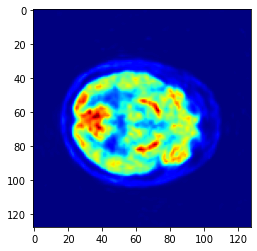

In [5]:
plt.imshow(readImage(glob.glob('./Dataset/AD/*/*/*.nii')[155])[:,:,30],cmap='jet')
plt.show()

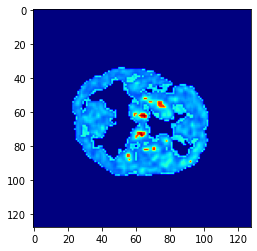

In [6]:
plt.imshow(X[100,0,:,:,32],cmap='jet')
plt.show()

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [8]:
Y= ohe.fit_transform(Y.reshape(-1,1)).asarray()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [12]:
y_train = y_train.toarray()
y_test = y_test.toarray()

## Making the Model